In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import joblib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("dataset.csv")
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df = df.where(pd.notnull(df))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5564 non-null   object
 1   Message   5564 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [6]:
ham = df[df['Category'] == 'ham']
spam = df[df['Category'] == 'spam']

ham_count = ham['Category'].count()
spam_count = spam['Category'].count()

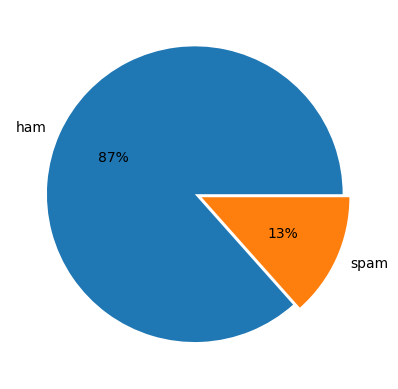

In [7]:
data = [ham_count,spam_count]
labels = ['ham','spam']
plt.pie(data,labels=labels,explode=[0,0.05],autopct='%.0f%%')

plt.show()

In [8]:
category_encoder = LabelEncoder()
df['category'] = category_encoder.fit_transform(df['Category'])

In [9]:
df['category'].value_counts()

category
0    4817
1     747
Name: count, dtype: int64

In [10]:
df.head()

,Category,Message,category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
x = df['Message']
y = df['category']

In [12]:
message_encoder = TfidfVectorizer()
message_encoder.fit(df['Message'])
message_encoded = message_encoder.transform(df['Message'])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(message_encoded,y,test_size=0.2,random_state=42)

In [14]:
x_train_ = x_train.toarray()
x_test_ = x_test.toarray()

In [15]:
base_model = [
    ('svm',SVC(random_state=42)),
    ('rf',RandomForestClassifier(random_state=42)),
    ('nb',MultinomialNB())
]

In [16]:
meta_model = LogisticRegression()

In [17]:
model = StackingClassifier(estimators=base_model,final_estimator=meta_model,cv = 4)

In [18]:
model.fit(x_train_,y_train)

StackingClassifier(cv=4,
                   estimators=[('svm', SVC(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('nb', MultinomialNB())],
                   final_estimator=LogisticRegression())

In [19]:
y_pred = model.predict(x_test_)

In [20]:
accuracy_score(y_test,y_pred)

0.9883198562443846

In [21]:
your_mail = ['You have a chance to won a prize']
your_mail_encoded = message_encoder.transform(your_mail)
your_mail_encoded = your_mail_encoded.toarray()
ans = model.predict(your_mail_encoded)

print("This is:",category_encoder.inverse_transform(ans)[0])

This is: spam


In [22]:
joblib.dump(model,'model_saved.joblib')

['model_saved.joblib']

In [23]:
joblib.dump(message_encoder,'message_encoder.joblib')

['message_encoder.joblib']